### Importing the basic libraries that are used to perform analysis on python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
soft_drink_full = pd.read_csv('Soft_drink.csv')
soft_drink_full['DATE'] = pd.to_datetime(soft_drink_full['DATE'])

### Lets look at the first few rows of the data

In [3]:
soft_drink_full.head()

,DATE,SALES
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


## `Set the DATE column as the index.`


In [4]:
soft_drink_full = soft_drink_full.set_index('DATE')

In [5]:
soft_drink_full.head()

,SALES
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


### We will be using data till 2017 to train and forecasting model and will be using the model to forecast the sales for 2018 onwards.

In [6]:
train = soft_drink_full.loc[:'2018-01-01',:]
test = soft_drink_full.loc['2017-12-01':,:]


In [7]:
train.head()

,SALES
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


## Making the time plot of the train dataset to visualise it


In [8]:
plt.figure(figsize=[15,10])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.plot(train)

## Question - 1: Write your observations about cold drink sales in detail.

In [9]:
# Run this cell and don't make any changes
for_sma = train.copy()

First, Let's use a simple forecasting technique. Implementing the simple moving average forecasting model with a rolling window of 12 months

In [10]:
for_sma['SMA_12'] = for_sma['SALES'].rolling(window = 12).mean()
for_sma.tail(1)

,SALES,SMA_12
DATE,,
2018-01-01,9564,12435.416667


## Question - 2: According to the results obtained in the previous question, what can you infer about the results obtained? Is the moving average model working fine? 

Now lets build an Auto-Regressive models

## Question-3: Before we moving ahead building an Auto Regressive model, we would be required to remove trend and seasonality from the give time series. Answer, why does Trend and seasonality affect Auto regressive models adversely and why is it required to be removed before building a ARIMA model?

## Lets check the rolling statistics 

In [11]:
train = train.iloc[:-1,:]
from matplotlib.pylab import rcParams
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()   
    rolstd  =  time_series.rolling(window = 12).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

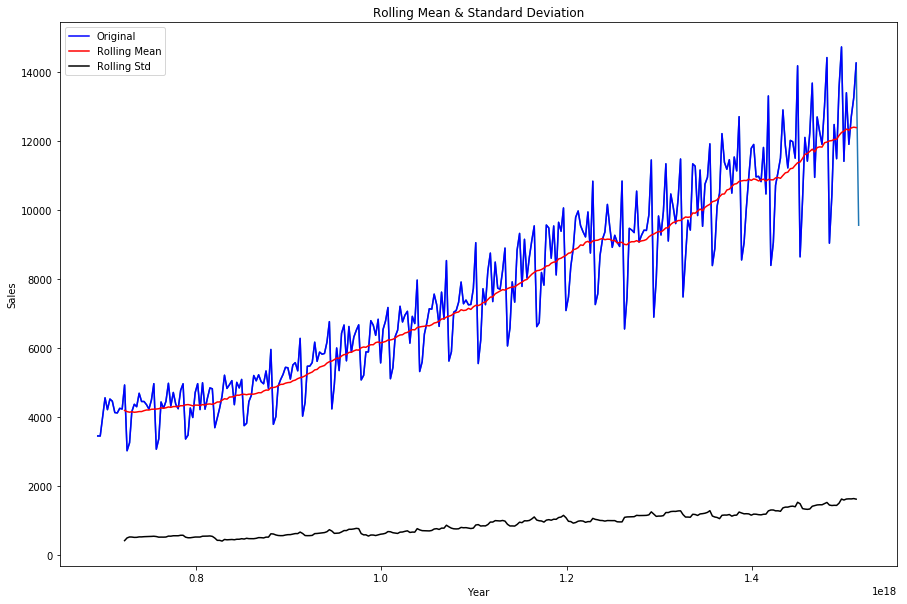

In [12]:
rolling_means(train)

## Question-4: Explain the significance of above step. What can we infre from the above results?

## Perform ADF test to check the stationarity of the data

In [13]:
def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['SALES'], autolag = 'AIC')

    dfoutput  =  round(pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']),4)
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [14]:
adf_test(train)

Results of Dickey Fuller Test:
Test Statistic                   1.352700
p-value                          0.996900
#Lags Used                      14.000000
Number of Observations Used    297.000000
Critical Value (1%)             -3.452561
Critical Value (5%)             -2.871321
Critical Value (10%)            -2.571982
dtype: float64


## Question-5: What is the null hypothesis of the ADF test? What can you infer from the results of this test?

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(train['SALES'])

ADF Test Statistic : 1.3526923542516183
p-value : 0.9968882671030981
#Lags Used : 14
Number of Observations Used : 297
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Log Transformation and Differencing

Here we will remove the trend and seasonality from our data.

In [18]:
log_trans = np.log(train['SALES'])

In [19]:
diff_data = pd.DataFrame(log_trans - log_trans.shift()).dropna()

## Question-6: Previously we have created a functions for plotting rolling mean and standard deviation. Use the same function and check the plot of `diff_data`

In [20]:
# Write your code here.

train = train.iloc[:-1,:]
from matplotlib.pylab import rcParams
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()   
    rolstd  =  time_series.rolling(window = 12).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

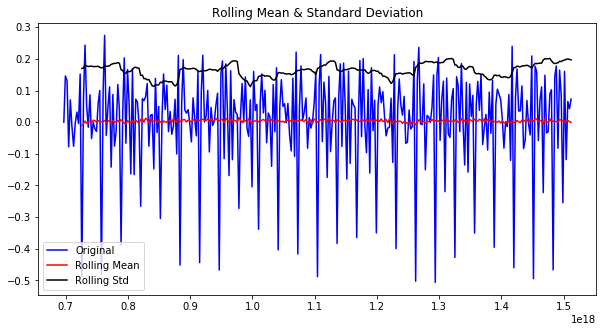

In [21]:
rolling_means(diff_data)

## Question-7: Previously we have created a functions for perfroming adf_test. Use the same function and check the adf_test results for `diff_data`

In [22]:
# Write your code here.
# Again test dickey fuller test
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic : -5.654363124425917
p-value : 9.697001896638912e-07
#Lags Used : 13
Number of Observations Used : 297
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(diff_data['SALES'])

## Question-8: Is the data stationary now? Explain the results here

## Now, before performing time series forecasting lets plot the acf and pacf

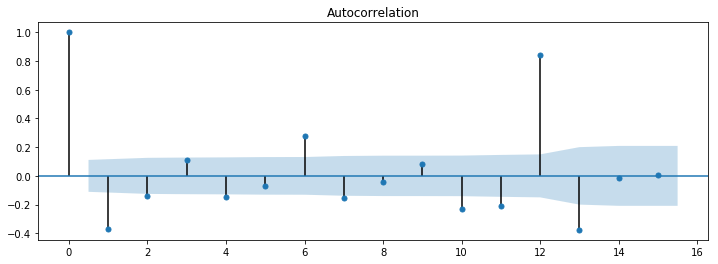

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

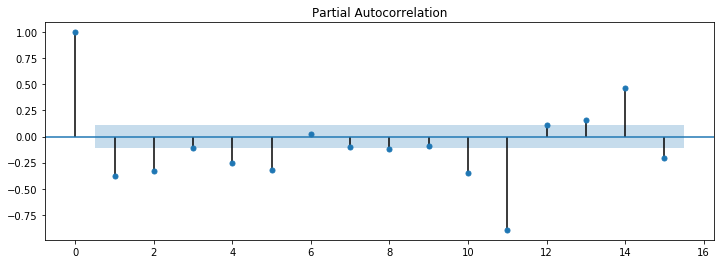

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

## Question-9: What can you infer from the above plots?

### Performing log transformation and differencing on the test dataset

In [25]:
log_test = np.log(test)
diff_test = pd.DataFrame(log_test - log_test.shift()).dropna()

Now let's build an AR Model using the differenced data

In [26]:
from statsmodels.tsa.ar_model import AR
model = AR(diff_data)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 16
Coefficients: const        0.019667
L1.SALES    -1.085123
L2.SALES    -0.975021
L3.SALES    -0.497694
L4.SALES    -0.519837
L5.SALES    -0.450582
L6.SALES    -0.411844
L7.SALES    -0.434022
L8.SALES    -0.426627
L9.SALES    -0.420957
L10.SALES   -0.455187
L11.SALES   -0.401415
L12.SALES    0.531180
L13.SALES    0.613058
L14.SALES    0.538473
L15.SALES    0.060629
L16.SALES    0.081035
dtype: float64


C:\Users\HP SMART\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [27]:
predictions = model_fit.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions.head()

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], diff_test.iloc[i]))
    

predicted=-0.391452, expected=-0.399803
predicted=0.126435, expected=0.085241
predicted=0.132359, expected=0.197015
predicted=-0.027488, expected=-0.062129
predicted=0.150793, expected=0.170732
predicted=0.053753, expected=0.030990
predicted=-0.210407, expected=-0.142990
predicted=0.139151, expected=0.120382
predicted=-0.120877, expected=-0.139874
predicted=0.078389, expected=0.115522
predicted=0.045330, expected=0.018514
predicted=0.050431, expected=0.089689
predicted=-0.364571, expected=-0.369173


## Plotting the AR MODEL 

In [28]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions)
plt.plot(diff_test)
print('Plotting AR model')

Plotting AR model


In [29]:
diff_test = diff_test['SALES']

## Evaluate the accuracy of the model using metrics such as MSE and MAPE

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(predictions, diff_test)

39.38713743710855

In [31]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


## Now let's build a MA Mode using the differenced data: Use order = (0,0,1)

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diff_data,order=(0,0,1))
results_MA = model.fit()
print('Lag: %s' % results_MA.k_ar)
print('Coefficients: %s' % results_MA.params)

C:\Users\HP SMART\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag: 0
Coefficients: const          0.003835
ma.L1.SALES   -0.963916
dtype: float64


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [33]:
predictions_ma = results_MA.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_ma.head()

for i in range(len(predictions_ma)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], diff_test.iloc[i]))

predicted=-0.101773, expected=-0.399803
predicted=0.003835, expected=0.085241
predicted=0.003835, expected=0.197015
predicted=0.003835, expected=-0.062129
predicted=0.003835, expected=0.170732
predicted=0.003835, expected=0.030990
predicted=0.003835, expected=-0.142990
predicted=0.003835, expected=0.120382
predicted=0.003835, expected=-0.139874
predicted=0.003835, expected=0.115522
predicted=0.003835, expected=0.018514
predicted=0.003835, expected=0.089689
predicted=0.003835, expected=-0.369173


## Plotting the MA Model

In [34]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_ma)
plt.plot(diff_test)
print('Plotting AR model')

Plotting AR model


## Evaluate the accuracy of the MA model using metrics such as MSE and MAPE

In [35]:
mean_absolute_percentage_error(predictions_ma, diff_test)

3084.919914918522

In [36]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_ma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.029


## Using the value p as 11 and q as 2, building a ARMA model.

In [37]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(diff_data,order=(11,2))
model_arma = model.fit(transparams=False)
print('Lag: %s' % model_arma.k_ar)
print('Coefficients: %s' % model_arma.params)

C:\Users\HP SMART\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag: 11
Coefficients: const           0.003575
ar.L1.SALES    -0.962356
ar.L2.SALES    -0.974381
ar.L3.SALES    -0.930949
ar.L4.SALES    -0.971870
ar.L5.SALES    -0.940752
ar.L6.SALES    -0.909519
ar.L7.SALES    -0.962167
ar.L8.SALES    -0.919321
ar.L9.SALES    -0.933560
ar.L10.SALES   -0.980168
ar.L11.SALES   -0.899705
ma.L1.SALES    -0.235805
ma.L2.SALES     0.323044
dtype: float64


C:\Users\HP SMART\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


## Making predictions using ARMA model

In [38]:
predictions_arma = model_arma.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_arma.head()

for i in range(len(predictions_arma)):
    print('predicted=%f, expected=%f' % (predictions_arma[i], diff_test.iloc[i]))

predicted=-0.399508, expected=-0.399803
predicted=0.143016, expected=0.085241
predicted=0.144185, expected=0.197015
predicted=-0.061574, expected=-0.062129
predicted=0.177898, expected=0.170732
predicted=0.047422, expected=0.030990
predicted=-0.230804, expected=-0.142990
predicted=0.165238, expected=0.120382
predicted=-0.122455, expected=-0.139874
predicted=0.048071, expected=0.115522
predicted=0.096923, expected=0.018514
predicted=-0.001918, expected=0.089689
predicted=-0.344856, expected=-0.369173


In [39]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_arma)
plt.plot(diff_test)
print('Plotting ARMA model')

Plotting ARMA model


## Evaluate the accuracy of the ARMA model using metrics such as MSE and MAPE`

In [40]:
mean_absolute_percentage_error(predictions_arma, diff_test)

400.0851333831701

In [41]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_arma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.003


## Question-10: Compare AR,MA and ARMA models using the evaluation metrics and decide the best performing model.